# **Diabetes Risk Analysis - Data Modelling**

## Objectives

- Predict the category of diabetes risk based on various health metrics for individuals.
- Use machine learning models to classify individuals into low, medium, or high diabetes risk categories.
- Evaluate model performance using accuracy, precision, recall, and F1-score metrics.
- Visualize the results to understand the distribution of diabetes risk categories.

## Inputs

- Dataset: `cardio_data_with_diabetes_risk_clean.csv`

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk'

---

## Load necessary libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing necessary libraries for machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix


## Load cleaned dataset for AB testing

In [36]:
path = 'dataset/cleaned/cardio_data_with_diabetes_risk_clean.csv'
df = pd.read_csv(path)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,...,age_group,bmi_category,age_simp_group,bmi_simp_cat,diab_risk_percent,diab_risk_cat,age_group_num,bmi_category_num,bp_category_num,diab_risk_cat_num
0,2,168,4.127134,110,80,1,1,0,0,1,...,50-59,Normal,Middle-aged,Low BMI,16.15,Low Risk,3,1,2,0
1,1,156,4.442651,140,90,3,1,0,0,1,...,50-59,Obese I,Middle-aged,Mid BMI,57.50,High Risk,3,3,3,2
2,1,165,4.158883,130,70,3,1,0,0,0,...,50-59,Normal,Middle-aged,Low BMI,18.21,Low Risk,3,1,2,0
3,2,169,4.406719,150,100,1,1,0,0,1,...,40-49,Overweight,Middle-aged,Mid BMI,19.62,Low Risk,2,2,3,0
4,1,156,4.025352,100,60,1,1,0,0,0,...,40-49,Normal,Middle-aged,Low BMI,9.76,Low Risk,2,1,0,0


---

**Split the dataset into Training and Testing sets as a preparation for model training**

- **Training Set**: 80% of the data, used to train the model.
- **Testing Set**: 20% of the data, used to evaluate the model's performance.

In [37]:
# Load the dataset
X = df[['age_group_num', 'bmi_category_num', 'bp_category_num', 'active', 'gender']]
y = df['diab_risk_cat_num']

# Train/Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54564, 5), (13641, 5), (54564,), (13641,))

## Cross-Validation

***Cross-validation is a powerful method used in machine learning to evaluate the performance of a model on unseen data. It works by partitioning the training data into multiple subsets, training the model on some subsets and validating it on others. This process helps in assessing how the model is likely to perform on independent data.***

## StratifiedKFold
Since regular ***KFold*** doesn't ensure that each fold has the same proportion of class labels as the full dataset — which may lead to `biased performance` estimates when classes are imbalanced.

`StratifiedKFold` addresses this issue by preserving the percentage of samples for each class in each fold. This is particularly important for imbalanced datasets, where some classes may be underrepresented.

Since my **Target** column classes are imbalanced, I will use `StratifiedKFold` for cross-validation.

In [38]:
models = {
    'Logistic Regression' : LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree' : DecisionTreeClassifier(random_state=42),
    'Random Forest' : RandomForestClassifier(random_state=42)
}

# Set up StratifiedKFold cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # 5-fold cross-validation

for type, model in models.items():
    # Create a pipeline with scaling and the model
    model_pipe = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('model', model)               # Add the classifier
    ])

    # Perform cross-validation and get accuracy scores
    cross_val_performance = cross_val_score(model_pipe, X_train, y_train, cv=skfold, scoring='accuracy')

    print(f"Model: {type}")
    print(f"Cross-Validation Scores: {np.round(cross_val_performance, 4)}")  # Print scores for each fold
    print(f"Mean Accuracy: {cross_val_performance.mean():.4f}")              # Print mean accuracy
    print(f"Standard Deviation: {cross_val_performance.std():.4f}\n")        # Print std deviation

Model: Logistic Regression
Cross-Validation Scores: [0.9414 0.9393 0.9389 0.9361 0.941 ]
Mean Accuracy: 0.9394
Standard Deviation: 0.0019

Model: Decision Tree
Cross-Validation Scores: [0.9454 0.9425 0.9426 0.9414 0.9453]
Mean Accuracy: 0.9435
Standard Deviation: 0.0016

Model: Random Forest
Cross-Validation Scores: [0.9457 0.9428 0.9426 0.9415 0.9453]
Mean Accuracy: 0.9436
Standard Deviation: 0.0016



***Model Performance Comparison***

| **Model**               | **Fold Scores (Accuracy)**                | **Mean Accuracy** | **Std. Deviation** | **Notes**                                                                                                                             |
| ----------------------- | ----------------------------------------- | ----------------- | ------------------ | ------------------------------------------------------------------------------------------------------------------------------------- |
| **Logistic Regression** | \[0.9414, 0.9393, 0.9389, 0.9361, 0.9410] | 0.9394            | 0.0019             | Slightly lower accuracy; very consistent; great for interpretability; linear model performs well, indicating clean or separable data. |
| **Decision Tree**       | \[0.9454, 0.9425, 0.9426, 0.9414, 0.9453] | 0.9435            | 0.0016             | Strong performance and stability; simple tree model captures relationships well; may overfit slightly without pruning.                |
| **Random Forest**       | \[0.9457, 0.9428, 0.9426, 0.9415, 0.9453] | 0.9436            | 0.0016             | Best performance overall; extremely stable; ensemble model reduces overfitting risk and captures complex patterns effectively.        |

***Stability***
- Standard Deviation measures variability of accuracy across folds — lower values indicate more consistent performance.
- All models show very low std deviations (~0.0016 to 0.0019), indicating high stability across the different folds.
-Random Forest and Decision Tree have slightly better stability (0.0016) compared to Logistic Regression (0.0019).

***Insights and Summary***
- Random Forest achieves the highest mean accuracy (0.9436), but only marginally better than Decision Tree (0.9435). The difference is minimal, suggesting both ensemble and single-tree methods perform very well on this data.
- Logistic Regression has a slightly lower mean accuracy (0.9394), still very strong but a bit behind the tree-based models.
- Given the tiny standard deviations for all models, performance estimates are reliable and consistent across folds.
- Since Decision Tree and Random Forest have similar performance but Random Forest is an ensemble method (generally more robust to overfitting), Random Forest may be preferable if interpretability is less critical.
- Logistic Regression’s competitive accuracy indicates the data may be reasonably linearly separable or that the features scaled well with the model.

## Random Forest Classifier

As I can see from the model performance comparison, the Random Forest Classifier has the highest mean accuracy and stability. Therefore, I will use it for further analysis.

In [39]:
# Define a function to create a pipeline with feature scaling and Random Forest classifier
def create_rf_pipeline():
    # Create a pipeline with feature scaling and Random Forest classifier
    pipe = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('model', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest with 100 trees
    ])
    return pipe

rf_model = create_rf_pipeline()  # Initialize the pipeline
rf_model.fit(X_train, y_train)   # Fit the pipeline on the training data

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [40]:
# Evaluate the Random Forest model on the test set
rf_predictions = rf_model.predict(X_test)  # Make predictions on the test set
rf_predictions

array([1, 2, 1, ..., 1, 2, 1])

In [41]:
rf_ClassificationReport = classification_report(
    y_test, 
    rf_predictions, 
    target_names=[str(cls) for cls in sorted(y.unique())]
    )

rf_ConfusionMatrix = confusion_matrix(
    y_test, 
    rf_predictions
)

target_names = [str(cls) for cls in sorted(y.unique())]
print("Random Forest Model Performance:", target_names)

print("Confusion Matrix:\n", rf_ConfusionMatrix)
print("Classification Report:\n", rf_ClassificationReport)

Random Forest Model Performance: ['0', '1', '2']
Confusion Matrix:
 [[4480  450    0]
 [  22 6039  145]
 [   0  163 2342]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      4930
           1       0.91      0.97      0.94      6206
           2       0.94      0.93      0.94      2505

    accuracy                           0.94     13641
   macro avg       0.95      0.94      0.94     13641
weighted avg       0.95      0.94      0.94     13641



**<u>Confusion Matrix</u>**

*Class 0:*

- 4,480 correctly predicted as class 0.
- 450 misclassified as class 1.
- None misclassified as class 2.

*Class 1:*

- 6,039 correctly predicted.
- 22 misclassified as class 0.
- 145 misclassified as class 2.

*Class 2:*

- 2,342 correctly predicted.
- 163 misclassified as class 1.
- None misclassified as class 0.

**<u>Classification Report</u>**

***Key Insights:***

**Overall Performance**

- Accuracy = 94% — excellent overall performance on the test set.
- Macro Avg (0.94) and Weighted Avg (0.94) F1-scores indicate strong balance and consistency across all classes.

**Class-wise Analysis**
* Class 0 (Precision = 1.00, Recall = 0.91):
    - Very precise (almost no false positives), but some false negatives (450 instances were misclassified as class 1).
    - Suggests that when the model predicts class 0, it's nearly always correct — but it's sometimes too cautious in assigning class 0.
* Class 1 (Precision = 0.91, Recall = 0.97):
    - High recall — most actual class 1s were caught.
    - A bit lower precision — some class 1 predictions were actually class 0 or 2.
    - Suggests the model may overpredict class 1 in some edge cases.
* Class 2 (Precision = 0.94, Recall = 0.93):
    - Balanced performance, with some misclassifications into class 1.
    - Overall strong in identifying and predicting this class.

**Summary**

The model demonstrates excellent overall performance with a high accuracy of 94% and balanced precision, recall, and F1-scores across all classes. Class 0 predictions are extremely precise but slightly under-recalled, indicating some missed true positives, while class 1 and 2 are both well-classified with minor confusion between neighboring classes. Overall, the model is stable, reliable, and suitable for deployment with minimal performance concerns.

## Confusion Matrix and Classification Report Visualization

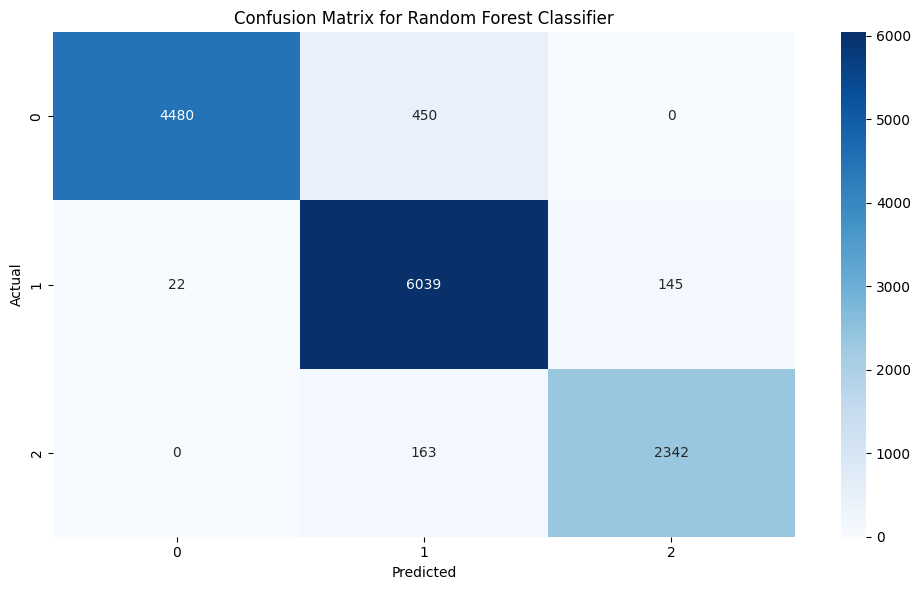

In [42]:
# Plotting the confusion matrix using seaborn heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(
    data=rf_ConfusionMatrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels = target_names,
    yticklabels = target_names)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

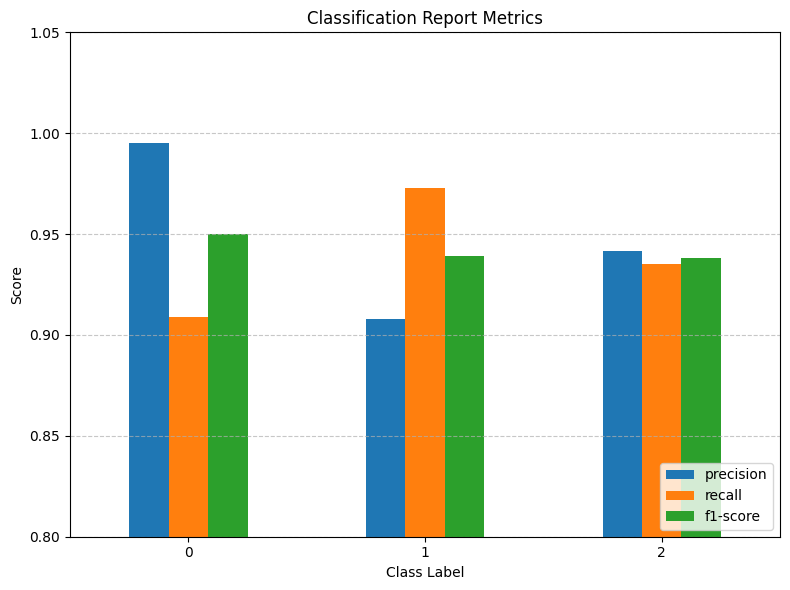

In [43]:
# Plotting the classification report metrics for Random Forest Classifier

# Generate classification report as a dictionary
report_dict = classification_report(y_test, rf_predictions, output_dict=True)

# Convert to DataFrame for easier plotting
report_df = pd.DataFrame(report_dict).transpose()

# Filter out the classes only (exclude avg/accuracy rows)
class_scores = report_df.iloc[:-3, :][['precision', 'recall', 'f1-score']]

# Plot
class_scores.plot(kind='bar', figsize=(8, 6))
plt.title('Classification Report Metrics')
plt.xlabel('Class Label')
plt.ylabel('Score')
plt.ylim(0.8, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
